# RISK FACTORS OF STROKE

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## BACKGROUND
A stroke occurs when blood flow to the brain is obstructed and cut off. And also when a blood vessel explodes in the brain, it causes a stroke.

Symptoms are varied but common ones include
facial paralysis, loss of balance and co-ordination, loss of body functions, confusion and sometimes death.


It is important we know the factors that predispose people to experiencing strokes. There are modifiable and non-modifiable factors. 
1. Modifiable factors include the risk factors ( things that positions you to easily get a disease) that can be changed or worked on;
- diet
- weight (obesity)
- hypertension
- diabetes
- smoking

2. Non-modifiable factors include
- age
- family history
- medical history
- race/gender (women and african americans)



## ABOUT THE DATA

The data is from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). It originally has 12 columns and 5110 rows.
1. id : unique row identifier
2. gender : male/ female/ other
3. age : age of patient
4. hypertension : 0- No hypertension, 1 if the patient has
5. heart disease: 0 - if there is no heart disease, 1 - if there is a heart disease
6. ever-married : yes/no
7. work_type: private, gov_job, never_worked, private, self employed
8. residence_type: rural, urban
9. avg_glucose_level: avg level of glucose in blood
10. bmi : body mass index
11. smoking status: formerly smoked, never smoked, smokes, unknown
12. stroke: 1- stroke 2- no stroke


### Goal
The goal of the project is to visualise the innfluence of the risk factors on stroke and also to create the system that predicts if a patient will have a stroke given 1 or 2 of the risk factors. Some questions to be explored include:
1. Which people are predisposed to stroke? (age, gender, economic status, life style choices )

2. which of the risk factors mainly contribute to strokes

## 1. Data Preparation

In [2]:
# importing the data

# makes the id column the index

data = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col='id')

# inspecting the top 5 rows
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# inspecting the bottom 5 rows
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
# summary statisitics of the data
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# summary statistics of object datatypes
data.describe(include = "object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [6]:
# inspecting the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [7]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
# checking the number of rows and columns
data.shape

(5110, 11)

### 1.1 Changing Column Data types

#### Changing data types of some columns

1. id - to object
2. age to whole numbers
3. hypertension to categorical
4. heart disease to categorical
5. ever married to categorical
6. work type to categorical
7. smoking status to categorical 
8. stroke to categorical

In [19]:
# the id  column has an integer data type

# data['id'] = data['id'].astype('object')



The id column has integers, as a unique id, it doesn't need calculations, hence converting it to an object datatype

In [20]:
cols= ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
    'smoking_status', 'stroke']

data[cols] = data[cols].astype('category')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   int32   
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(2), int32(1)
memory usage: 180.8 KB


In [22]:
data['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

In [23]:
data['gender'].unique()

['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

In [24]:
# changing the data column to whole numbers

data['age'] = data['age'].astype('int')
min(data['age'])


0

In [25]:
max(data['age'])

82

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   int32   
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(2), int32(1)
memory usage: 180.8 KB


### 1.2 Adding New Columns

The analysis would be more appreciable if the data is classified according to age brackets. The age classification is from the National Insitute of Health [NIH](https://www.nih.gov/nih-style-guide/age), and they are as follows:
1. infants : < 1 years
2. children : 1 - 12
3. Adolescents : 13 - 17
4. Adults : 18 - 64
5. Seniors : >65


At this point, a new column age_groups would be created from the age column in the dataframe 

In [27]:
# creates a new column and fills up various categories
# from the age column

data.loc[data['age']<1, 'age_group']='infant'
data.loc[data['age'].between(1, 13), 'age_group']='children'
data.loc[data['age'].between(13, 18), 'age_group']='adolescents'
data.loc[data['age'].between(18, 65), 'age_group']='adults'
data.loc[data['age']>65, 'age_group']='seniors'

In [28]:
# checking the new columns

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
id,,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,seniors
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,adults
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,seniors
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,adults
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,seniors


 A new column would also categorise the bmi column based on the BMI chart where a range on the scale gives an estimation of the weight of people. 
 
 NB: there are slightly different charts for males, females and children but for the sake of code uniformity, we will use the adult scale across
 
 The bmi chart is as follows from Center of Disease control and prevention[CDC](https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.).
 
 1. BMI < 18.5 - underweight
 2. 18.5< BMI< 25 - healthy weight
 3. 25< BMI< 30 -  overweight
 4. 30.0< BMI or higher - obese 

In [29]:
# creates a column, weight class
# classifies body weight

data.loc[data['bmi']<18.5, 'weight_class']='underweight'
data.loc[data['bmi'].between(18.5, 25), 'weight_class']='healthy weight'
data.loc[data['bmi'].between(25, 30), 'weight_class']='overweight'
data.loc[data['bmi']> 30, 'weight_class']='obese'

In [30]:
# inspecting the new data
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,weight_class
id,,,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,seniors,obese
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,adults,NaN
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,seniors,obese
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,adults,obese
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,seniors,healthy weight


In [31]:
# creating a copy of the data
data1 = data.copy()

In [32]:
data1['weight_class'].unique()

array(['obese', nan, 'healthy weight', 'overweight', 'underweight'],
      dtype=object)

The nan values within the data is from the bmi column, where some rows had no values for the bmi column

In [33]:
data1['hypertension'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [34]:
data1['heart_disease'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [35]:
data1['Residence_type'].unique()

['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']

In [36]:
data1['hypertension'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [37]:
data1['work_type'].unique()

['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']

In [38]:
data1['age'].describe()

count    5110.000000
mean       43.215264
std        22.633866
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

The data has the highest age being a 82, and the lowest being 0. The average age being 43.2, median 45.0. The data has a lot of adults being sampled.

In [39]:
data1['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

In [40]:
data1['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

There is just one entry for the 'Other' sex category. That particular row will be dropped 

In [41]:
# locates the specific row with the 
# gender column = Other
data1.loc[data1['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,weight_class
id,,,,,,,,,,,,,
56156,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,adults,healthy weight


In [42]:
# delets the specified row
data1.drop(labels=56156, axis=0, inplace=True)


In [43]:
# confirming the values under gender
data1['gender'].value_counts()

Female    2994
Male      2115
Other        0
Name: gender, dtype: int64

In [44]:
data1['avg_glucose_level'].describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

### 1.3 Checking data skewness

In [45]:
# checking for the skewness of the data
data1[['age','bmi', 'avg_glucose_level']].skew()

age                 -0.140796
bmi                  1.055063
avg_glucose_level    1.572815
dtype: float64

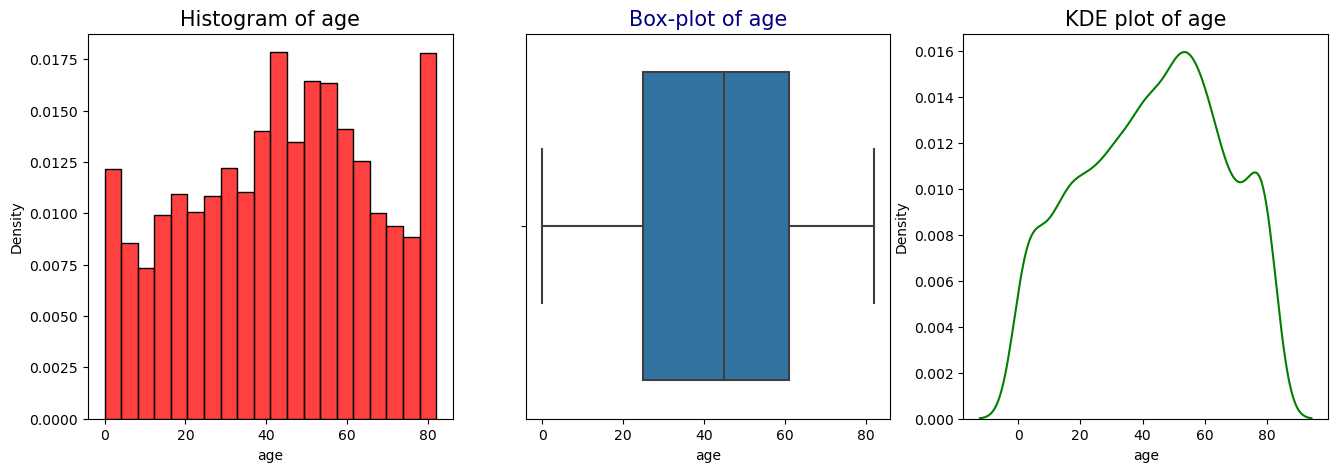

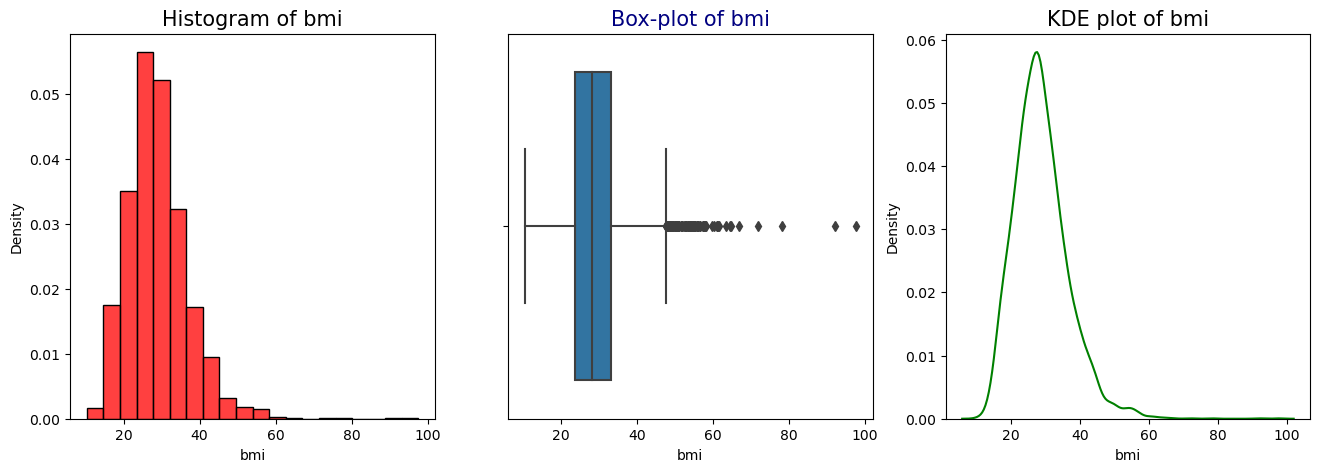

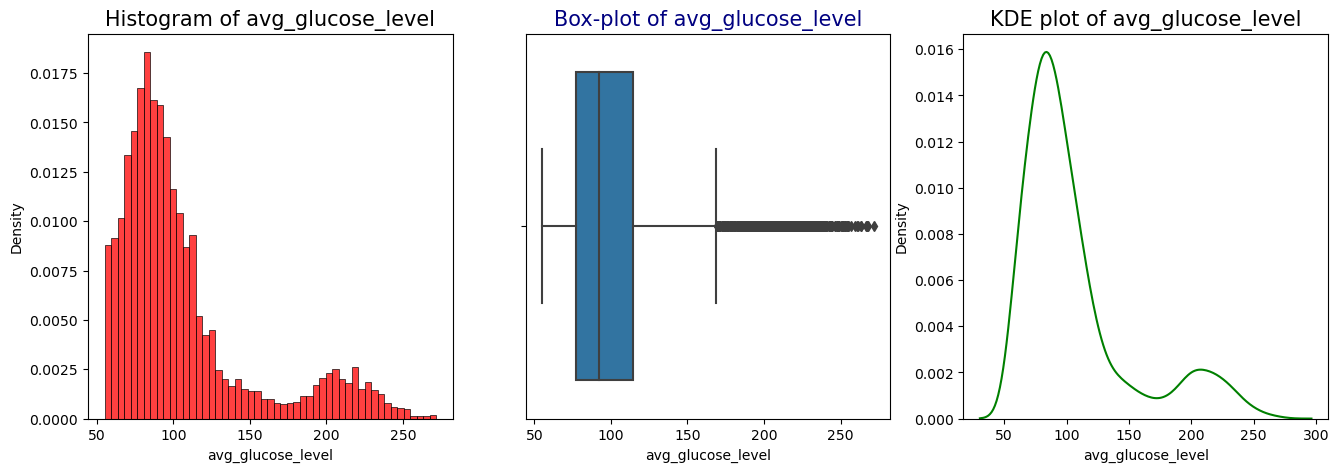

In [46]:
colim = data1[['age','bmi', 'avg_glucose_level']]

for i, x in enumerate(colim):
    plt.figure(figsize=(16, 5))
    bins = 'auto'
    if i in [0,1]:
        bins = 20
    plt.subplot(1,3,1)
    sns.histplot(data=data1, x=x, stat='density', bins=bins, color='r')
    plt.title(f'Histogram of {x}', size=15)
    
    # for the bmi column
    plt.subplot(1,3,2)
    sns.boxplot(data=data1, x=x)
    plt.title(f'Box-plot of {x}', size=15, color='navy')
    
    # for average glucose column
    plt.subplot(1,3,3)
    sns.kdeplot(data=data1, x=x, color ='g')
    plt.title(f'KDE plot of {x}', size=15)

NB:  Working with patients, and given health conditions, patients could present varying degrees of parameters like avg_glucose level ( it is higher for diabetic patients), for the bmi too factors like obesity could also result in higher figures too. Because of these factors, the outliers are still important in the analysis.

## EXPLORATORY DATA ANALYSIS

For the initial visualisations, it will be a univariate analysis of the individual columns within the dataset. Then subsequently to considering multivariate concepts from the data. 

Here we will look at the various columns and their contribution to the dataset.

In [47]:
data1['stroke'].unique()

[1, 0]
Categories (2, int64): [0, 1]

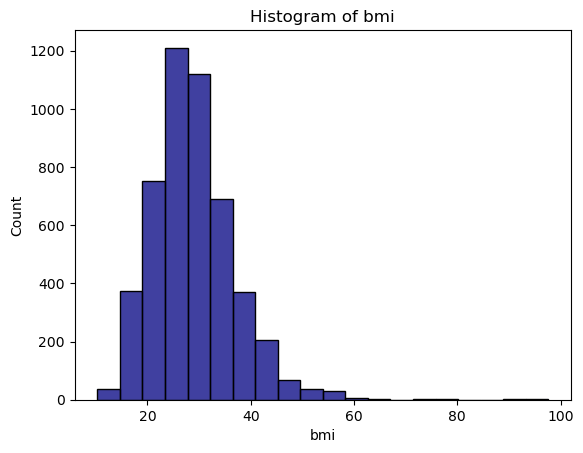

In [48]:
# distribution of patient bmi
sns.histplot(data1["bmi"], bins=20, color='navy')
plt.title("Histogram of bmi")
plt.show()

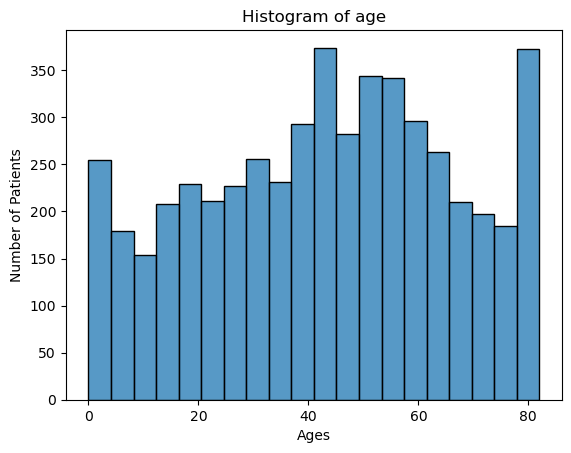

In [49]:
# distribution of age
sns.histplot(data1["age"], bins=20)
plt.title("Histogram of age")
plt.xlabel('Ages')
plt.ylabel('Number of Patients')
plt.show()

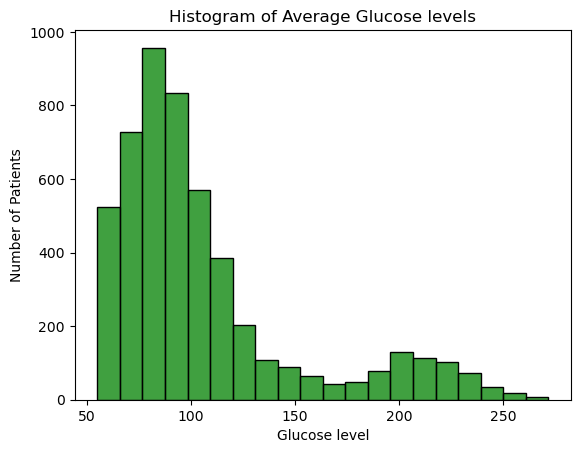

In [50]:
sns.histplot(data1["avg_glucose_level"], bins=20, color='g')
plt.title("Histogram of Average Glucose levels")
plt.xlabel('Glucose level')
plt.ylabel('Number of Patients')
plt.show()

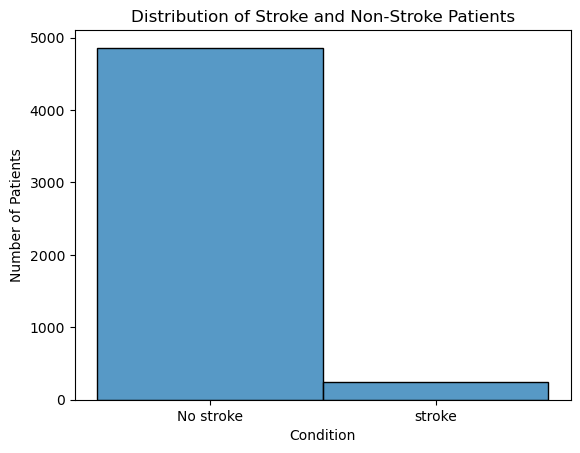

In [51]:
# distribution of stroke and non-stroke patients
sns.histplot(data=data1, x="stroke", legend=True)
plt.title('Distribution of Stroke and Non-Stroke Patients')
plt.xticks([0,1], ['No stroke', 'stroke'])

plt.xlabel('Condition')
plt.ylabel('Number of Patients')
plt.show()

There are far fewer stroke patients than there are non-stroke patients

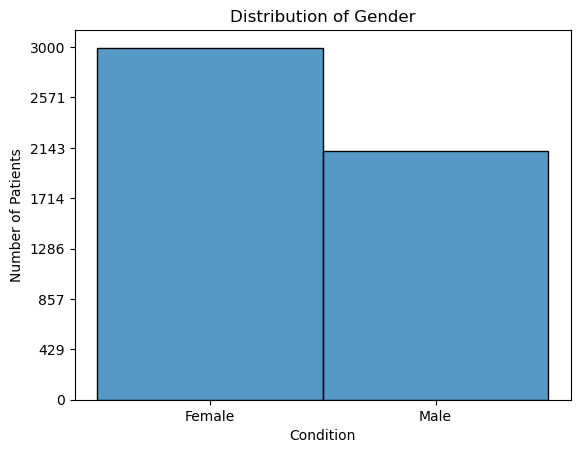

In [52]:
sns.histplot(data=data1, x="gender", legend=True)
plt.title('Distribution of Gender')
plt.yticks(np.linspace(0, 3000, 8))
plt.xticks(['Female', 'Male'])

plt.xlabel('Condition')
plt.ylabel('Number of Patients')
plt.show()

The data has more female respondents than male respondents

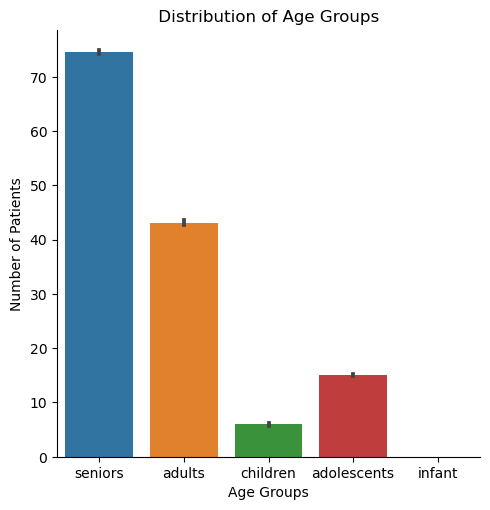

In [53]:
sns.catplot(data=data1, x="age_group", y="age", kind="bar")
plt.title(' Distribution of Age Groups ')


plt.xlabel('Age Groups')
plt.ylabel('Number of Patients')
plt.show()

Out of the data sample, a majority of the participants were above 65, followed by adults (18-64), adolescents then the children.

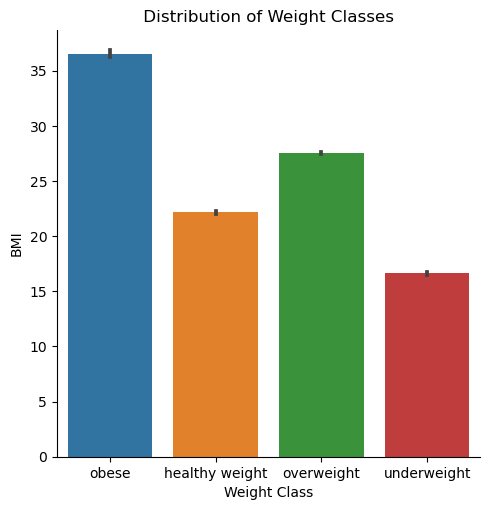

In [54]:
sns.catplot(data=data1, x="weight_class", y="bmi", kind="bar")
plt.title(' Distribution of Weight Classes ')


plt.xlabel('Weight Class')
plt.ylabel('BMI')
plt.show()

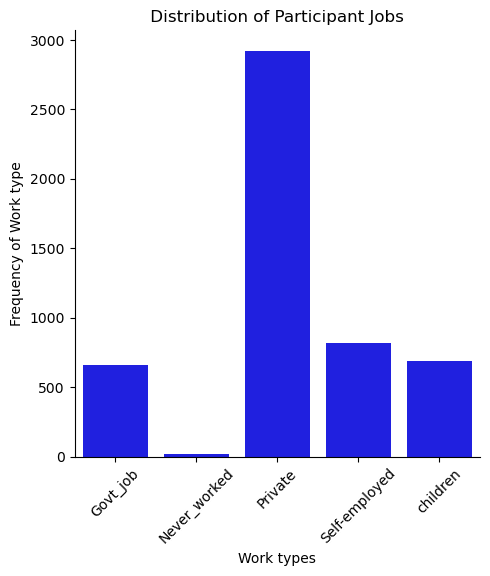

In [55]:
sns.catplot(data=data1, x="work_type", kind="count", color='b')
plt.title(' Distribution of Participant Jobs ')

plt.xticks(rotation=45)
plt.xlabel('Work types')
plt.ylabel('Frequency of Work type')
plt.show()

A majority of the participants were employed in private businesses, followed by the government workers and self-employed people

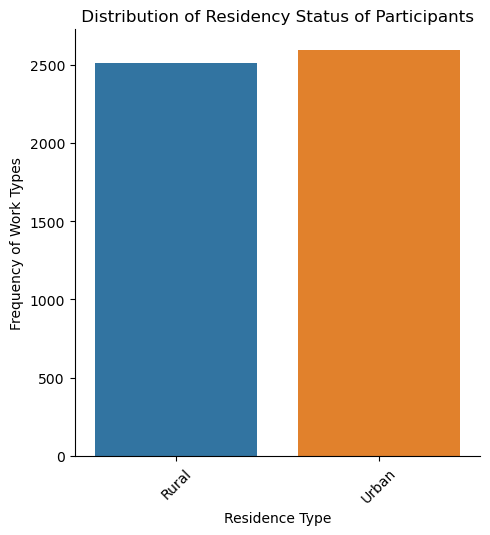

In [56]:
sns.catplot(data=data1, x="Residence_type", kind="count")
plt.title(' Distribution of Residency Status of Participants ')

plt.xticks(rotation=45)
plt.xlabel('Residence Type')
plt.ylabel('Frequency of Work Types')
plt.show()

A majority of the participants, were from the urban areas, however, the difference is not wide,

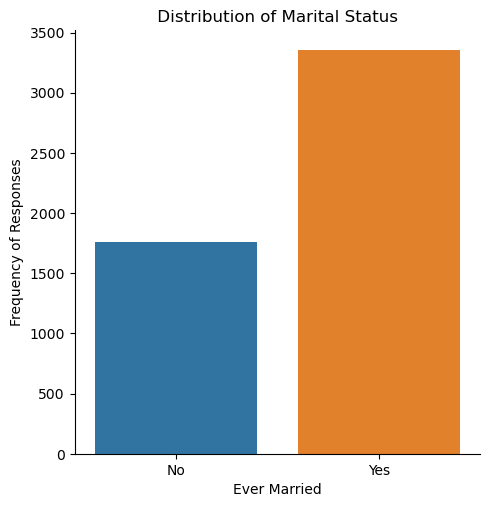

In [57]:
sns.catplot(data=data1, x="ever_married", kind="count")
plt.title(' Distribution of Marital Status ')

plt.xlabel('Ever Married')
plt.ylabel('Frequency of Responses')
plt.show()

Most of the participants are married

### 2.2 Visualisations on Multiple Columns

Here, we consider factors that are directly associated with stroke. We will segment the data between the stroke and no stroke and then we move on the consider multiple columns 

In [58]:

stroke_pat = data1.loc[data1['stroke']==1]
stroke_pat.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,weight_class
id,,,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,seniors,obese
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,adults,NaN
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,seniors,obese
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,adults,obese
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,seniors,healthy weight


Locates the number of rows with the stroke column being 1

In [59]:
stroke_pat.shape

(249, 13)

Unfortunately, the data only has a 249 rows of stroke patients. However we can still use this project as a blueprint for when there is more data. We will answer the questions from this point

1. Which people are predisposed to stroke? (age, gender, economic status, life style choices )

2. which of the risk factors mainly contribute to strokes

#### Which people are predisposed to stroke - Gender

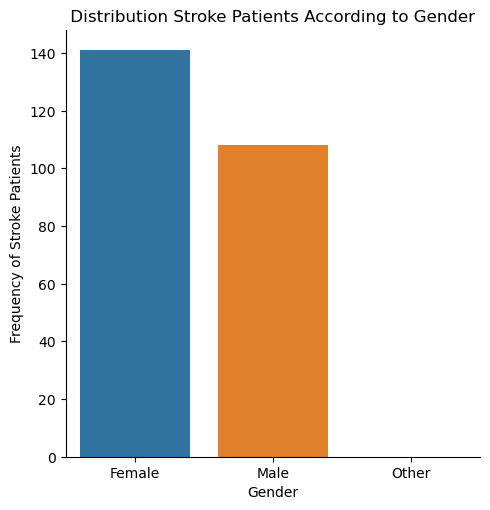

In [60]:
sns.catplot(data=stroke_pat, x='gender', kind="count")
plt.title(' Distribution Stroke Patients According to Gender ')

plt.xlabel('Gender')
plt.ylabel('Frequency of Stroke Patients')
plt.show()

There are more females affected by stroke than males. A female count of 140 and a male count of 109

#### Which people are predisposed to stroke - Age

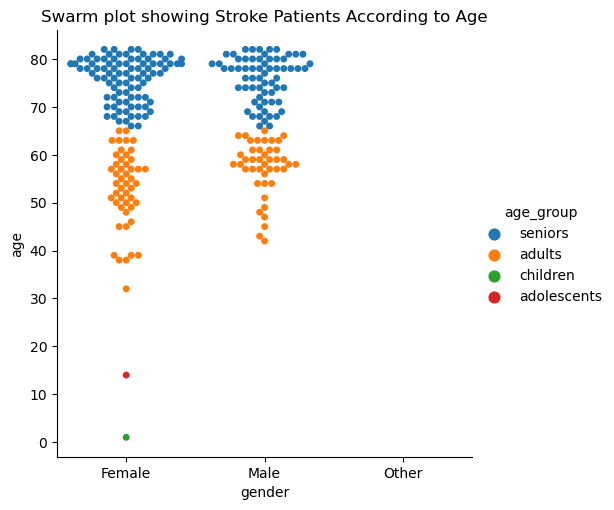

In [61]:
sns.catplot(data=stroke_pat, x="gender", y="age", hue="age_group",
             kind="swarm")
plt.title('Swarm plot showing Stroke Patients According to Age')
plt.show()

1. From the swarmplot, the females have a few data points in relatively early years, (between 30 years and 50). A majority of the females are clustered in their 80s and 70s. There are 2 occurences among people under 20.

2. The earliest occurence among males is between mid-forties and fify. The clusters get thicker between mid fifties and and mid-seventies. The highest are seen in their 80s

#### Which people are predisposed to stroke - Economic Factors

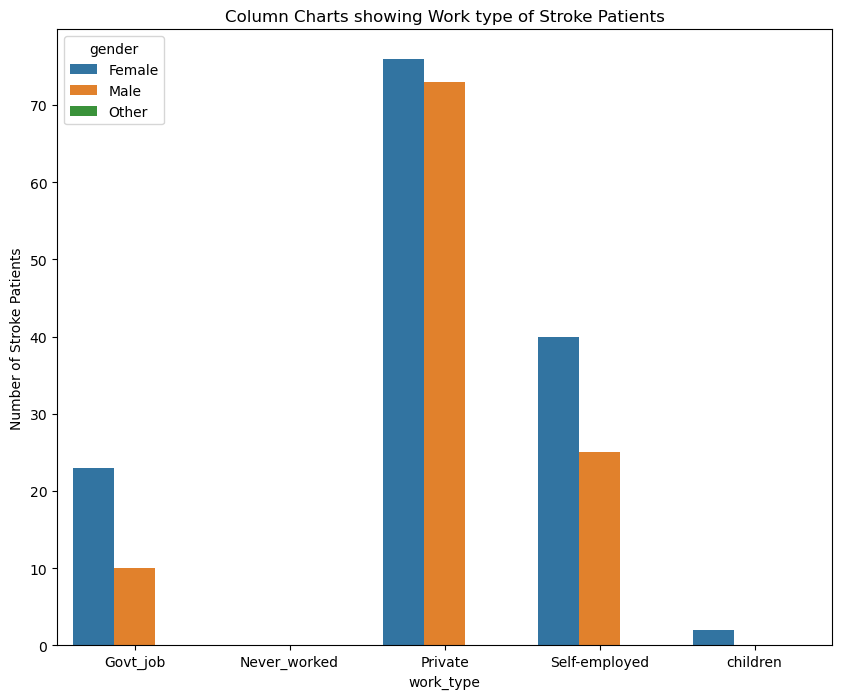

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(x='work_type', data=stroke_pat, hue='gender')
plt.title('Column Charts showing Work type of Stroke Patients')
plt.ylabel('Number of Stroke Patients')
plt.show()

1. Having already seen females having a high number of stroke cases, let's consider the work types. Over 70 of the stroke patients worked/work in the private sector. 

2. The next group, were people engaged in self-employement activities.

3. The last group however are those involved in goverment jobs.



Let's also consider their type of Residence

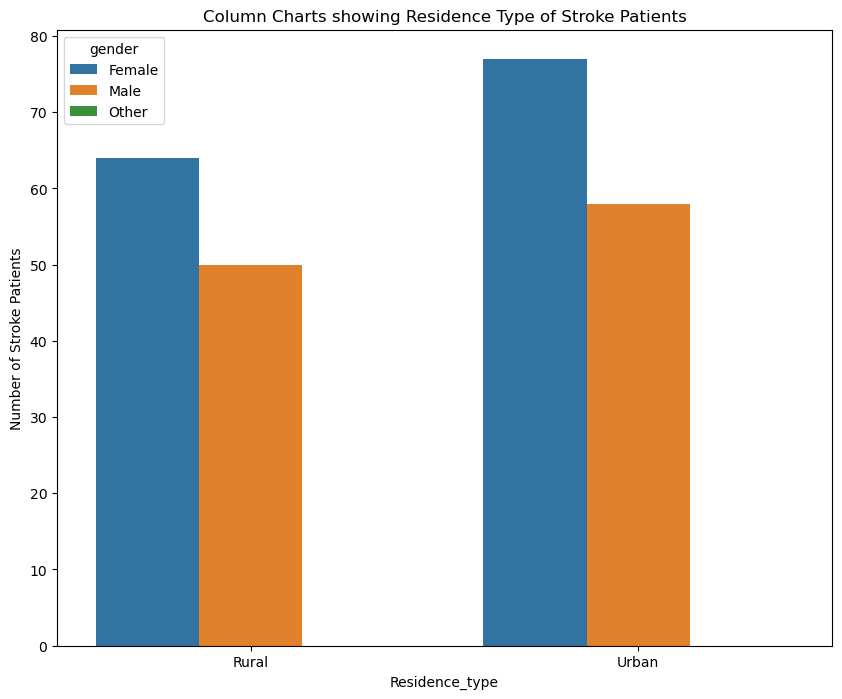

In [63]:
plt.figure(figsize=(10,8))
sns.countplot(x='Residence_type', data=stroke_pat, hue='gender')
plt.title('Column Charts showing Residence Type of Stroke Patients')
plt.ylabel('Number of Stroke Patients')
plt.show()

There is a higher number of both male and female stroke patients in the urban areas compared to the rural areas

#### Which people are predisposed to stroke - Lifestyle Choices

1. Weight categories

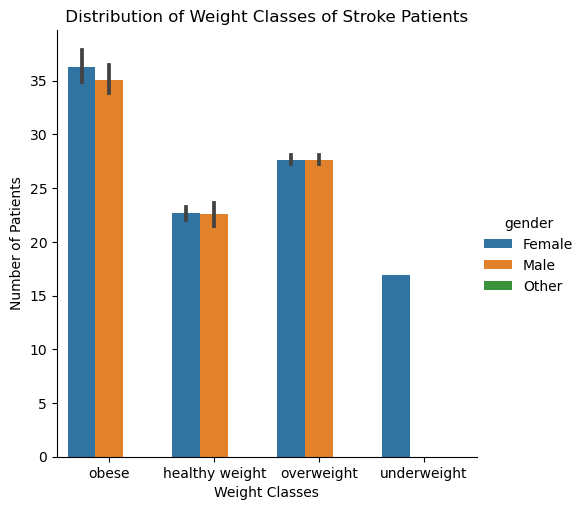

In [64]:
sns.catplot(data=stroke_pat, x="weight_class", y="bmi", kind="bar", hue='gender')
plt.title(' Distribution of Weight Classes of Stroke Patients ')


plt.xlabel('Weight Classes')
plt.ylabel('Number of Patients')
plt.show()

There were more obessed skroke patients (above 35 for both gender), followed by overweight patients (with a count of above 25 for both genders).

The other detail however, is that people with healthy weight and even underweight still have a good representation.

2. Underlying Health Issues - Hypertensives  

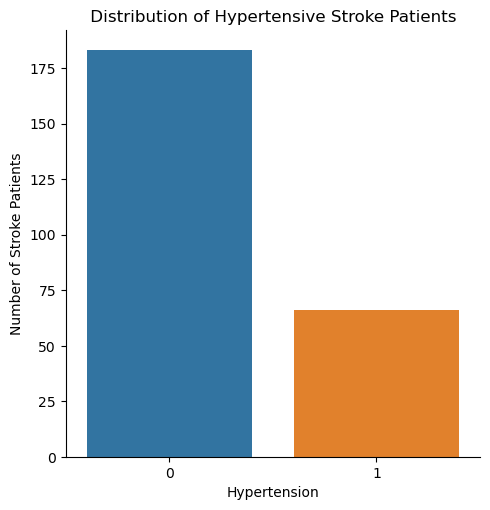

In [65]:
sns.catplot(data=stroke_pat, x="hypertension", kind="count")
plt.title(' Distribution of Hypertensive Stroke Patients ')

plt.xlabel('Hypertension')
plt.ylabel('Number of Stroke Patients')
plt.show()

175 out of the 249 stroke patients are not hypertensive.

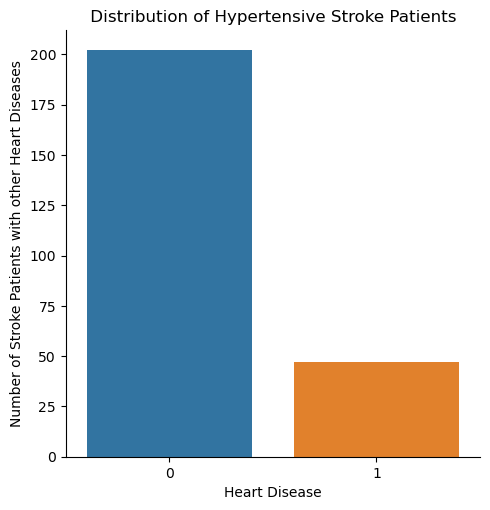

In [66]:
sns.catplot(data=stroke_pat, x="heart_disease", kind="count")
plt.title(' Distribution of Hypertensive Stroke Patients ')

plt.xlabel('Heart Disease')
plt.ylabel('Number of Stroke Patients with other Heart Diseases')
plt.show()

Under 50 stroke patients have other heart problems.

 Underlying Health Issues - Eating Habits

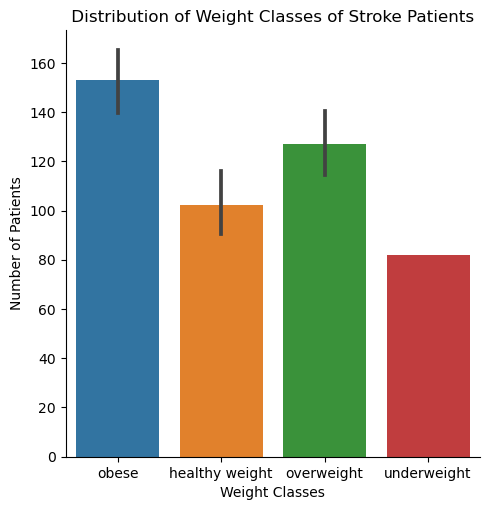

In [67]:
sns.catplot(data=stroke_pat, x="weight_class", y="avg_glucose_level", kind="bar")
plt.title(' Distribution of Weight Classes of Stroke Patients ')


plt.xlabel('Weight Classes')
plt.ylabel('Number of Patients')
plt.show()

The obesed people have higher average levels of glucose in their blood. Followed by overweight people, people with healthy weight and finally underweight people. 


At this point, we have explored all the columns present in the data. Let's use a statistical measure to find a relationship between the various features of the dataset. Let's use a correlation metric

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
streak = pd.read_csv('healthcare-dataset-stroke-data.csv')
streak.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
streak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


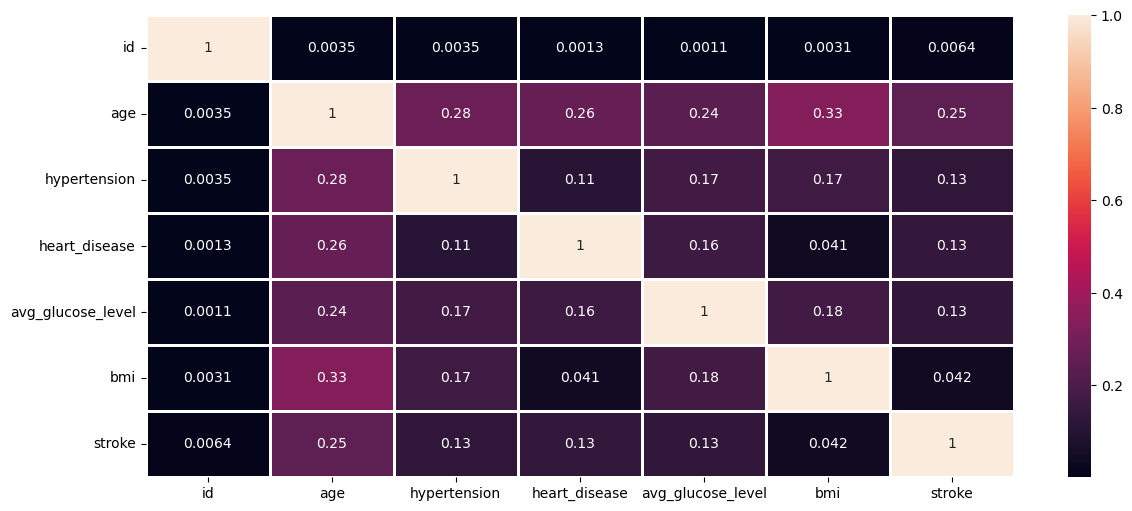

In [13]:
plt.figure(figsize=(14,6))
corr=abs(streak.corr())
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()



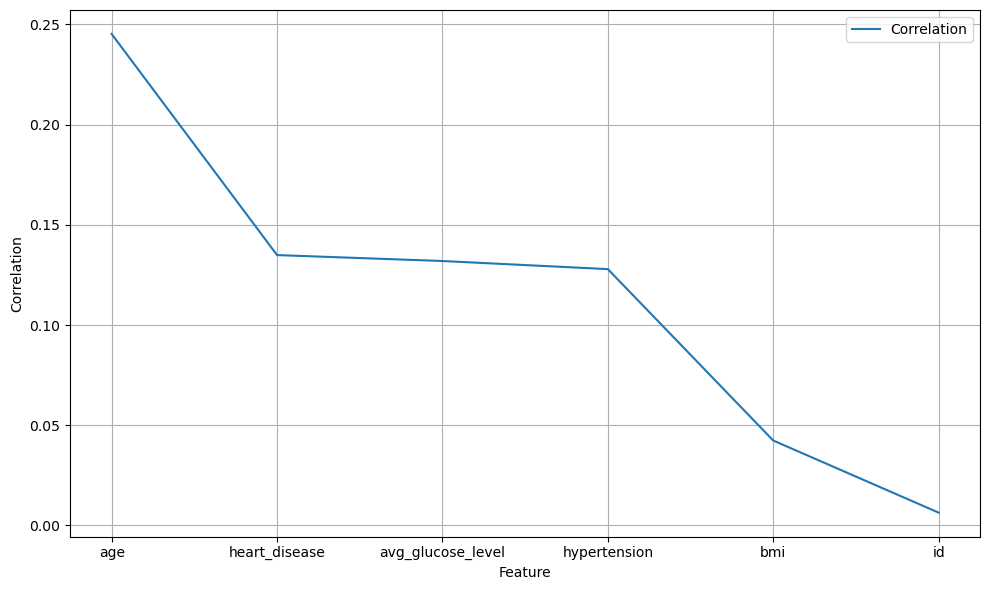

In [14]:
# Plot feature correlations with target variable
plt.figure(figsize=(10,6))
plt.plot(corr["stroke"].sort_values(ascending=False)[1:],label="Correlation")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()